In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import requests
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [53]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/weight-height.csv'
data=pd.read_csv(url)


In [54]:
df0=data.copy()
df1=data.copy()
df3=data.copy()

In [55]:
df0.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [56]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [57]:
df0.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [58]:
df0["Gender"].value_counts()

Male      5000
Female    3555
Name: Gender, dtype: int64

# Apply LabelEncoding

In [59]:
label_encoder = LabelEncoder()

In [60]:
df0["Gender"]=label_encoder.fit_transform(df0["Gender"])
df0.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [61]:
df2=df0.copy()

In [62]:
df2.head()


,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [63]:
df2['Gender'] = df2['Gender'].map({1: 'Male', 0: 'Female'})
gender_counts = df2['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

gender_counts


,Gender,Count
0,Male,5000
1,Female,3555


In [64]:
fig = px.bar(gender_counts, x='Gender', y='Count', color='Gender')

fig.update_layout(
    title={'text': 'Male VS Female', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis={'title': 'Gender'},
    yaxis={'title': 'Count'}
)

fig.show()


In [65]:
df0.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [66]:

correlation_matrix = df0.corr()

fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                               x=correlation_matrix.columns,
                               y=correlation_matrix.columns,
                               colorscale='Viridis'))
fig.update_layout( title={'text': 'Male VS Female', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'})

# Show the plot
fig.show()


In [67]:
train_data=df0[["Height","Gender"]]
label_data=df0["Weight"]

# Split Data

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data,label_data, test_size=0.3, random_state=42)

# LinearRegression Model

In [69]:
ln_model = LinearRegression()
ln_model.fit(X_train, Y_train)

LinearRegression()

# Train Score

In [70]:
train_score=ln_model.score(X_train,Y_train)
print(f"Training Score is {train_score}")

Training Score is 0.8973793060969246


# Test Score

In [71]:
test_score=ln_model.score(X_test,Y_test)
print(f"Training Score is {test_score}")

Training Score is 0.905911242442266


In [72]:
pred0=ln_model.predict(X_test)


# Mean Squared Error_LinearRegression

In [73]:
a=mean_squared_error(Y_test,pred0)
print(a)

96.83734437830611


# KNeighborsRegressor
**Using weight="distance"**

In [74]:
knr_model=KNeighborsRegressor(n_neighbors=5,weights="distance")

In [75]:
knr_model.fit(X_train,Y_train)

KNeighborsRegressor(weights='distance')

In [76]:
knr_train_score=knr_model.score(X_train,Y_train)
print(f"Kneighbours Regressor is {knr_train_score}")

Kneighbours Regressor is 1.0


In [77]:
knr_test_score=knr_model.score(X_test,Y_test)
print(f"Kneighbours Regressor is {knr_test_score}")

Kneighbours Regressor is 0.8599135905481369


In [78]:
pred1=knr_model.predict(X_test)

# Mean Squared Error Knr_Distance

In [79]:
b=mean_squared_error(Y_test,pred1)
print(b)

144.17871196233452


# KNeighborsRegressor
**Using weight="uniform"**

In [80]:
knr_model0=KNeighborsRegressor(n_neighbors=5,weights="uniform")

In [81]:
knr_model0.fit(X_train,Y_train)

KNeighborsRegressor()

In [82]:
knr_train_score0=knr_model0.score(X_train,Y_train)
print(f"Kneighbours Regressor is {knr_train_score0}")

Kneighbours Regressor is 0.9172142723737918


In [83]:
knr_test_score0=knr_model0.score(X_test,Y_test)
print(f"Kneighbours Regressor is {knr_test_score0}")

Kneighbours Regressor is 0.8821086423439015


# Mean Squared Error _KNR_Uniform

In [84]:
pred2=knr_model0.predict(X_test)

In [85]:
c=mean_squared_error(Y_test,pred2)
print(c)

121.33528273624482


# Using KNC

In [86]:
df0.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [87]:
new_train_data=df0[["Height","Weight"]]
new_label_data=df0["Gender"]

In [88]:
X_train0,X_test0,Y_train0,Y_test0=train_test_split(new_train_data,new_label_data,test_size=0.3,random_state=42)

# Create KNC Model

In [89]:
knc=KNeighborsClassifier(n_neighbors=5,weights="uniform")

In [90]:
knc.fit(X_train0,Y_train0)

KNeighborsClassifier()

In [91]:
knc_train_score=knc.score(X_train0,Y_train0)
print(f"Kneighbours Regressor is {knc_train_score}")

Kneighbours Regressor is 0.9291917167668671


In [92]:
knc_test_score=knc.score(X_test0,Y_test0)
print(f"Kneighbours Regressor is {knc_test_score}")

Kneighbours Regressor is 0.9131281651733542


In [93]:
pred3=knc.predict(X_test0)

# Mean Squared Error KNC_Uniform

In [94]:
d=mean_squared_error(Y_test0,pred3)
print(d)

0.08687183482664589


# KNC Using Distance

In [95]:
knc1=KNeighborsClassifier(n_neighbors=5,weights="distance")

In [96]:
knc1.fit(X_train0,Y_train0)

KNeighborsClassifier(weights='distance')

In [97]:
knc_train_score0=knc1.score(X_train0,Y_train0)
print(f"Kneighbours Regressor is {knc_train_score0}")

Kneighbours Regressor is 1.0


In [98]:
knc_test_score0=knc1.score(X_test0,Y_test0)
print(f"Kneighbours Regressor is {knc_test_score0}")

Kneighbours Regressor is 0.9026100506427737


# Mean Squared Error_KNC_Distance

In [99]:
pred4=knc1.predict(X_test0)

In [100]:
e=mean_squared_error(Y_test0,pred4)
print(e)

0.09738994935722634


# Compare Model Result

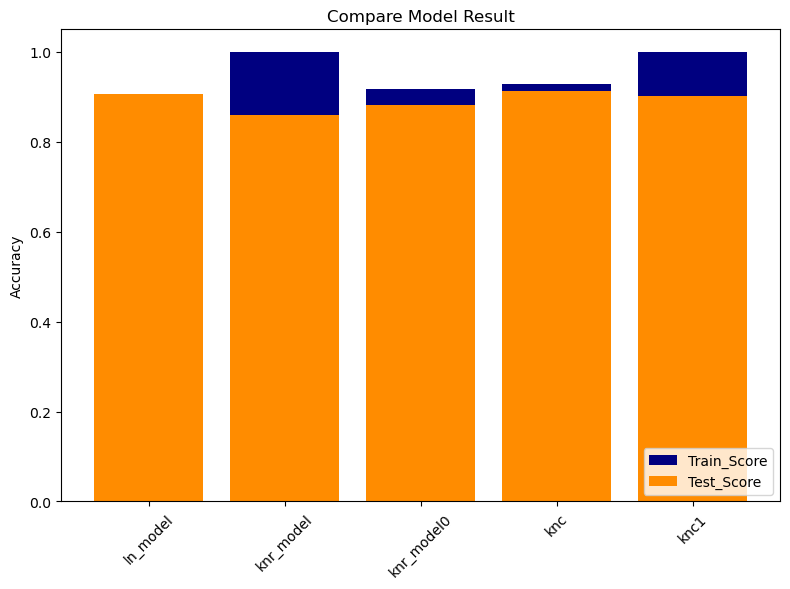

In [101]:
model_name = ["ln_model","knr_model","knr_model0","knc","knc1"]
train_scores = [train_score,knr_train_score,knr_train_score0,knc_train_score,knc_train_score0]
test_scores = [test_score,knr_test_score,knr_test_score0,knc_test_score,knc_test_score0]

num_model = np.arange(len(model_name))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(num_model, train_scores, align="center", color='navy', label="Train_Score")
ax.bar(num_model, test_scores, align="center", color='darkorange', label="Test_Score")

ax.set_xticks(num_model)
ax.set_xticklabels(model_name, rotation=45)
ax.set_ylabel('Accuracy')
ax.set_title("Compare Model Result")

ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

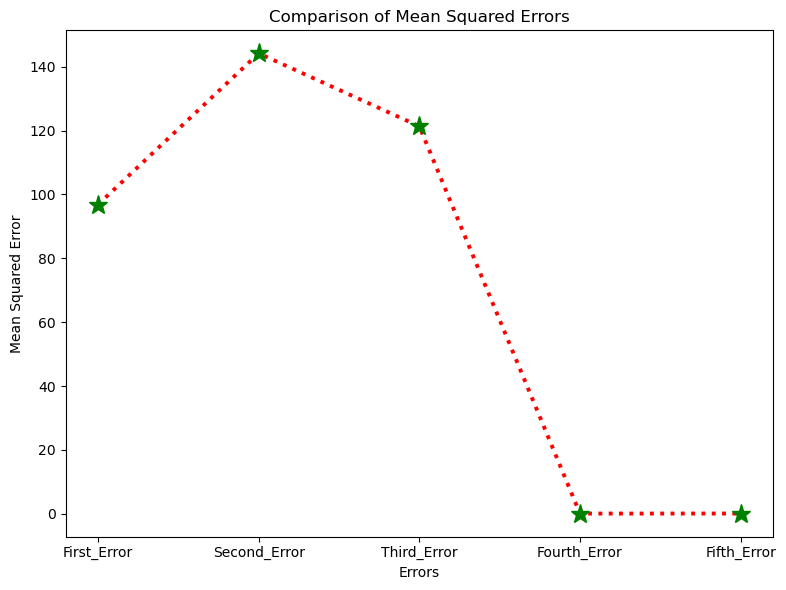

In [102]:

mse_value = [a, b, c, d, e]
labels = ["First_Error","Second_Error","Third_Error","Fourth_Error","Fifth_Error"]
num_errors = range(len(mse_value))
plt.figure(figsize=(8,6))
plt.plot(num_errors, mse_value, marker="*",linestyle=":",lw=2.8,markersize=14,color="red",
                  markerfacecolor="green",markeredgecolor="green" )
plt.xticks(num_errors, labels)
plt.ylabel('Mean Squared Error')
plt.xlabel('Errors')
plt.title('Comparison of Mean Squared Errors')

plt.tight_layout()
plt.show()


<div style="text-align: center;">
  <img src="https://media3.giphy.com/media/l3q2FnW3yZRJVZH2g/giphy.gif?cid=ecf05e47bxvsfgji9zkszcq98nxutgqg2vythwtlcx6nuap6&ep=v1_gifs_related&rid=giphy.gif&ct=g" style="width: 100%;">
</div>

